In [1]:
library(readr)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# TODO; 
# - Identify stories
# - Worst Tendency has to be done with per capita or in percent

In [3]:
# Laender mit HDI und Groesse der Population
country_metrics <- read_csv(
  paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
         "country_metrics.csv"))

Parsed with column specification:
cols(
  `Country Name` = col_character(),
  shortName = col_character(),
  EFConsPerCap = col_double(),
  HDI = col_double(),
  Population = col_double()
)
Warning message:
"176 parsing failures.
row col  expected    actual
  1  -- 5 columns 6 columns
  2  -- 5 columns 6 columns
  3  -- 5 columns 6 columns
  4  -- 5 columns 6 columns
  5  -- 5 columns 6 columns
... ... ......... .........
See problems(...) for more details.
"

In [4]:
# Veraenderungen in den Ländern
country_deltas <- read_csv(
  paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
         "EF_GDP(constant2010USD).csv"))

Parsed with column specification:
cols(
  Country = col_character(),
  EF2013 = col_double(),
  EF2009 = col_double(),
  GDP2013 = col_double(),
  GDP2009 = col_double(),
  EFDelta = col_double(),
  GDPDelta = col_double(),
  DDelta = col_double(),
  EFDelta_P = col_double(),
  GDPDelta_P = col_double(),
  DDelta_P = col_double(),
  DDelta_Rank = col_double(),
  EFDelta_Rank = col_double(),
  GDPDelta_Rank = col_double(),
  Dec_Flag = col_double(),
  GDP_std = col_double()
)


In [5]:
# Joining everthing together
left_join(country_deltas, country_metrics, 
          by = c("Country" = "Country Name")) -> country_metrics_with_impact  

In [6]:
country_metrics_with_impact  %>% head(10)

Country,EF2013,EF2009,GDP2013,GDP2009,EFDelta,GDPDelta,DDelta,EFDelta_P,GDPDelta_P,DDelta_P,DDelta_Rank,EFDelta_Rank,GDPDelta_Rank,Dec_Flag,GDP_std,shortName,EFConsPerCap,HDI,Population
Afghanistan,27270736,20868574,1.973134e+10,1.469733e+10,6402162.5,5034005320,5027603158,30.678486,34.251151,3.572665,102,149,140,0,28.05540,Afghanistan,0.89,0.48,30682500
Albania,6616186,6815357,1.254247e+10,1.150029e+10,-199170.9,1042172611,1042371782,-2.922384,9.062140,11.984524,62,34,47,1,26.92949,Albania,2.29,0.76,2883281
Algeria,90957355,76216524,1.763250e+11,1.556050e+11,14740830.8,20720000000,20705259169,19.340728,13.315767,-6.024961,135,128,69,0,52.58095,Algeria,2.38,0.74,38186136
Angola,22957308,17607133,9.626143e+10,7.975320e+10,5350175.7,16508232970,16502882794,30.386411,20.699148,-9.687263,142,148,101,0,40.04147,Angola,0.98,0.53,23448200
Argentina,158699622,119344052,4.576390e+11,3.859560e+11,39355570.6,71683000000,71643644429,32.976566,18.572843,-14.403724,146,151,93,0,96.64007,Argentina,3.73,0.82,42538304
Armenia,6193203,5844214,1.073658e+10,9.060944e+09,348989.1,1675640140,1675291151,5.971531,18.492997,12.521466,58,71,92,0,26.64665,Armenia,2.07,0.74,2992192
Australia,204837815,216496002,1.241480e+12,1.119650e+12,-11658186.1,121830000000,121841658186,-5.384943,10.881079,16.266022,44,26,56,1,219.40449,Australia,8.80,0.94,23270464
Austria,51883278,49630217,4.046870e+11,3.828510e+11,2253060.8,21836000000,21833746939,4.539696,5.703524,1.163829,115,68,33,0,88.34678,Austria,6.11,0.89,8486962
Azerbaijan,21861066,18768195,5.723834e+10,5.045352e+10,3092870.6,6784817568,6781724697,16.479318,13.447660,-3.031658,131,116,70,0,33.92971,Azerbaijan,2.30,0.75,9497496
Bangladesh,117772779,100248357,1.385970e+11,1.091950e+11,17524421.6,29402000000,29384475578,17.481006,26.926141,9.445135,72,119,119,0,46.67203,Bangladesh,0.75,0.57,157157392


Warning message:
"Removed 6 rows containing missing values (geom_point)."

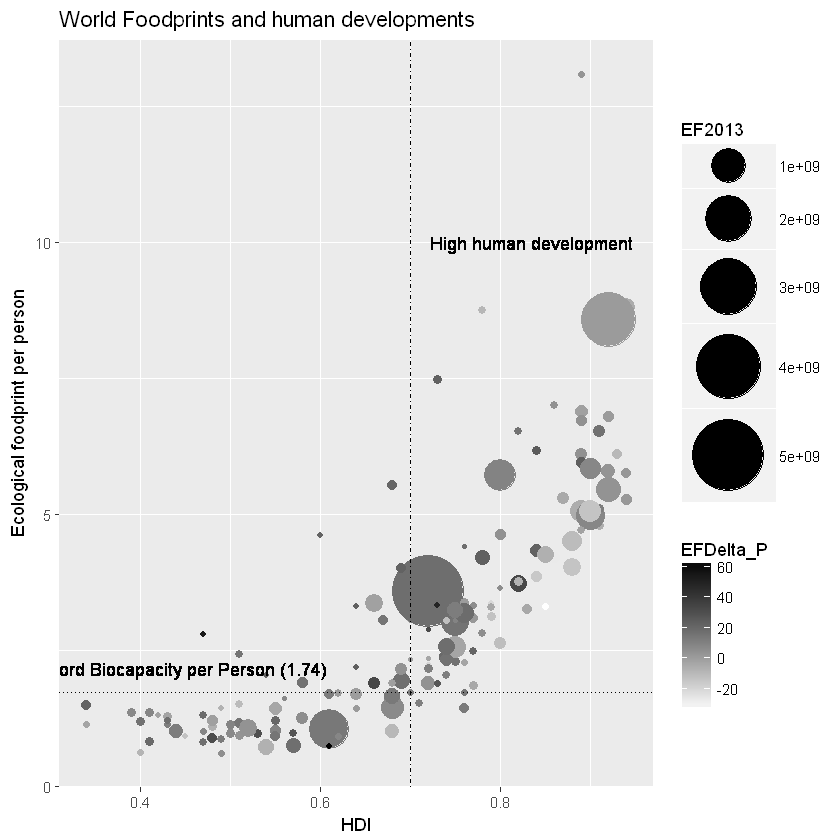

In [7]:
# Bubbble Chart with all variables
country_metrics_with_impact %>% 
  ggplot() + 
  scale_size(range = c(1, 20)) +
  geom_point(aes(HDI, EFConsPerCap, size = EF2013, colour = EFDelta_P)) +
  scale_colour_gradient(low = "white", high = "black") +
  geom_hline(aes(yintercept=1.74), 
             linetype = 3) +
  geom_text(aes(y=1.74, x=.45, label="Word Biocapacity per Person (1.74)"),
            vjust=-1.2) +
  # geom_text(aes(x = HDI, EFConsPerCap, label = Country)) +
  geom_vline(aes(xintercept = .7), linetype = 4) +
  geom_text(aes(x=.7, y=10, label = "High human development"),
            hjust = -.1)+
  ylab("Ecological foodprint per person")+
  ggtitle("World Foodprints and human developments")


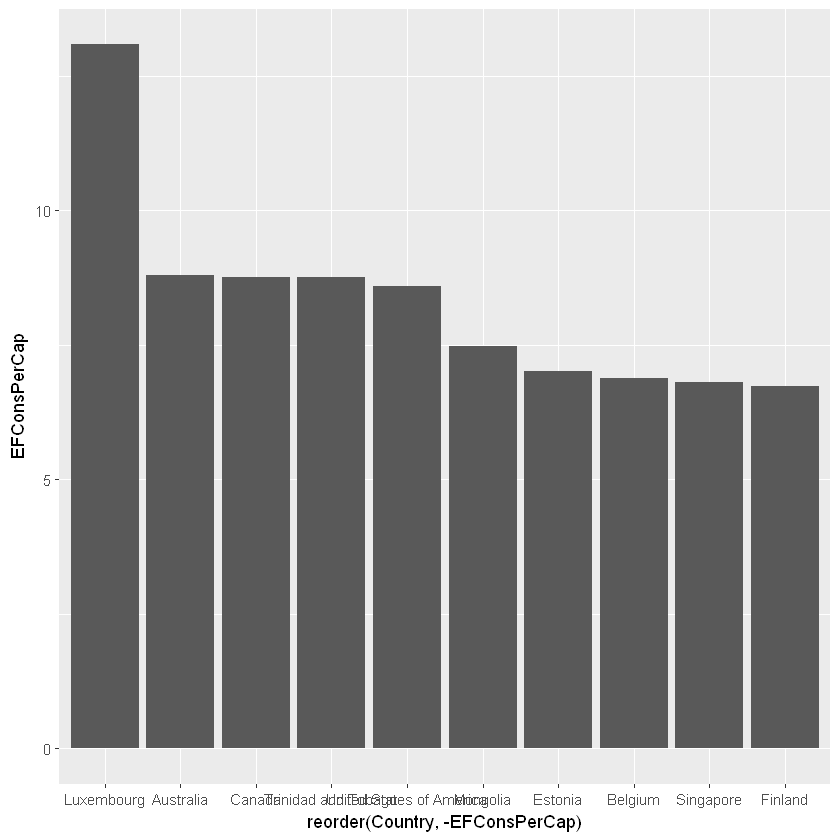

In [8]:
# Highest and lowest Countries in total
#################################################################################################################

# Countries with highest EF
# (Mongolia is interesting - why?)
country_metrics_with_impact %>% 
  select(Country, EFConsPerCap) %>% 
  arrange(desc(EFConsPerCap)) %>% 
  head(10) %>% 
  ggplot() +
  geom_bar(aes(reorder(Country, -EFConsPerCap), EFConsPerCap),
           stat = "identity")

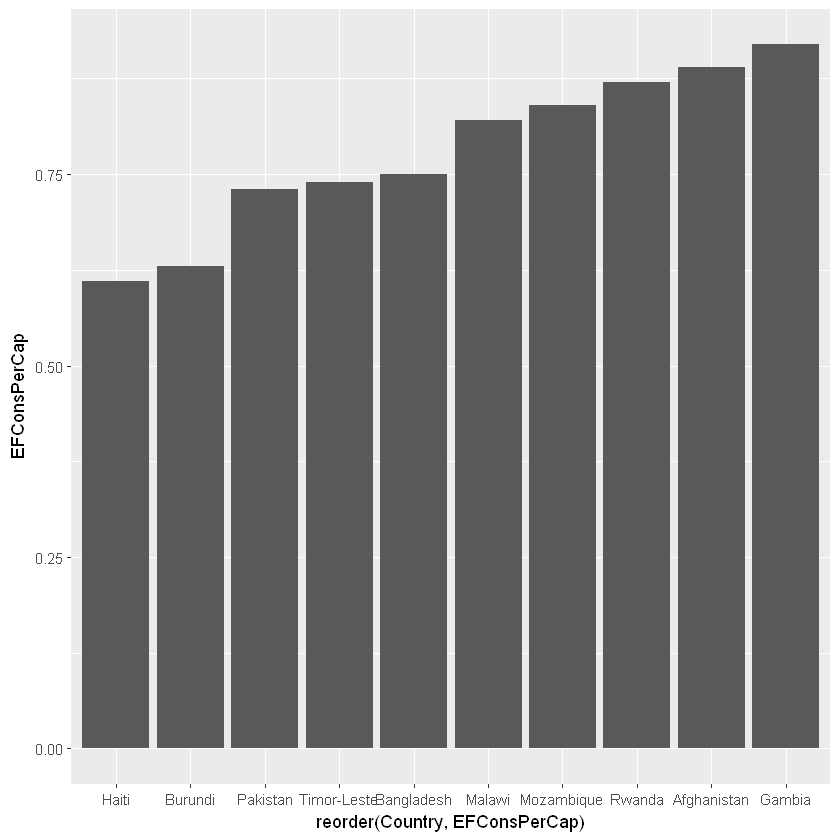

In [9]:
# Countries with lowest EF
country_metrics_with_impact %>% 
  select(Country, EFConsPerCap) %>% 
  arrange(EFConsPerCap) %>% 
  head(10)%>% 
  ggplot() +
  geom_bar(aes(reorder(Country, EFConsPerCap), EFConsPerCap),
           stat = "identity")

In [10]:
# Highest and lowest Tendencies
#################################################################################################################

# Worst tendencies
country_metrics_with_impact  %>% 
    arrange(desc(EFDelta_Rank)) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10)

Country,EF2009,EF2013,EFDelta,EFDelta_P
Timor-Leste,515762.9,839659.4,323896.49,62.79949
Djibouti,1562672.3,2408004.5,845332.20,54.09530
Fiji,1964426.7,2927679.8,963253.10,49.03482
Oman,16328716.2,22137212.7,5808496.41,35.57228
Iraq,48653218.6,64839766.5,16186547.84,33.26922
Argentina,119344051.8,158699622.3,39355570.57,32.97657
Tonga,229266.7,304041.1,74774.35,32.61457
Afghanistan,20868574.0,27270736.5,6402162.48,30.67849
Angola,17607132.7,22957308.4,5350175.73,30.38641
Zambia,11542128.4,14746246.8,3204118.45,27.76020


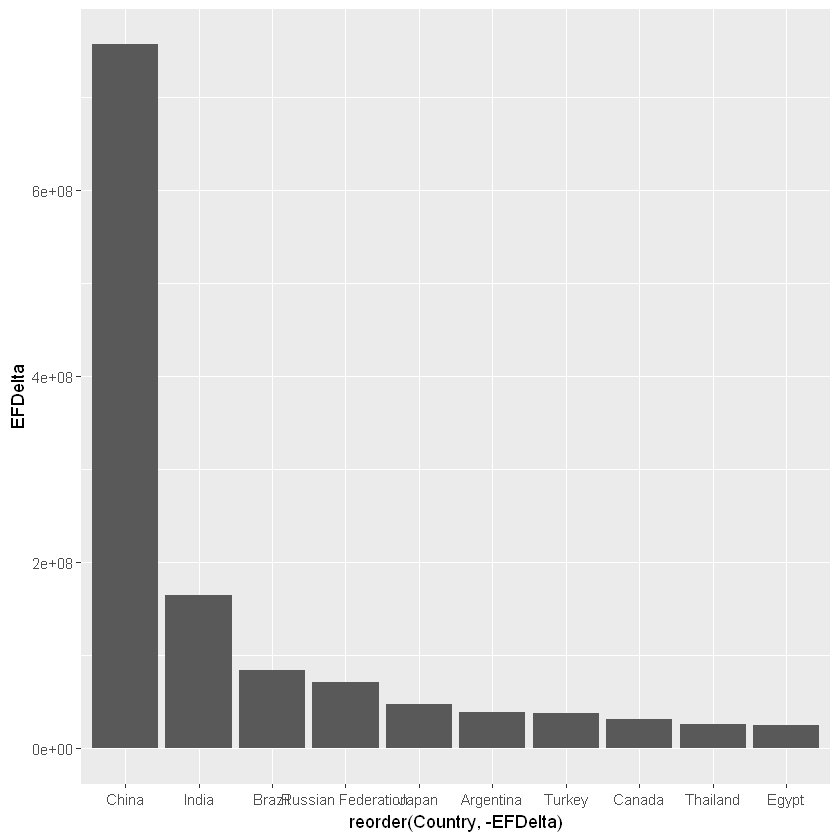

In [11]:
# in total numbers 
country_metrics_with_impact %>% 
  select(Country, EFDelta, EF2009, EF2013) %>% 
  arrange(desc(EFDelta)) %>% 
  head(10) %>% 
  ggplot() +
  geom_bar(aes(reorder(Country, -EFDelta), EFDelta),
           stat = "identity")

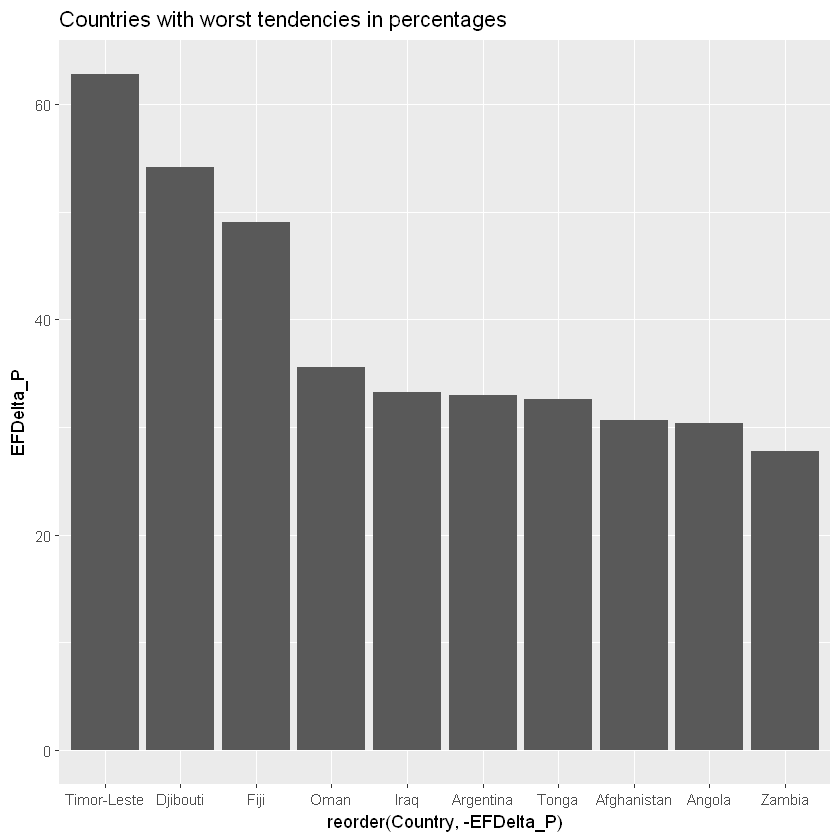

In [12]:
country_metrics_with_impact  %>% 
    arrange(desc(EFDelta_Rank)) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10) %>% 
    ggplot() +
      geom_bar(aes(reorder(Country, -EFDelta_P), EFDelta_P),
           stat = "identity")+
        ggtitle("Countries with worst tendencies in percentages")

In [13]:
# Best tendencies
country_metrics_with_impact  %>% 
    arrange(EFDelta_Rank) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10)

Country,EF2009,EF2013,EFDelta,EFDelta_P
Cyprus,5741441.1,3774867.6,-1966573.42,-34.25226
Greece,63928319.1,46510880.1,-17417438.99,-27.24526
Barbados,1207194.6,949884.1,-257310.50,-21.31475
Dominica,203575.8,161736.1,-41839.73,-20.55241
Portugal,47930963.6,40486481.9,-7444481.75,-15.53168
United Kingdom,375214593.9,322976417.8,-52238176.18,-13.92221
Spain,217226969.0,187128933.6,-30098035.37,-13.85557
Gambia,1975427.5,1715254.4,-260173.14,-13.17047
Bulgaria,26116832.6,22680547.3,-3436285.30,-13.15736
Macedonia TFYR,7249968.2,6341191.9,-908776.38,-12.53490


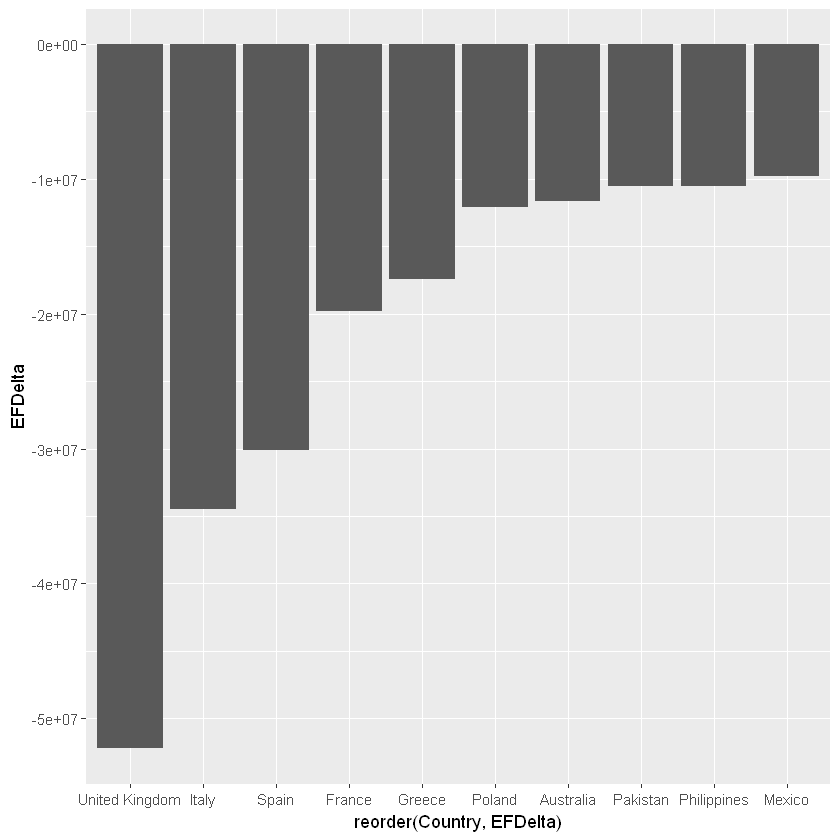

In [14]:
# Countries with best tendency
country_metrics_with_impact %>% 
  select(Country, EFDelta, EF2009, EF2013) %>% 
  arrange(EFDelta) %>% 
  head(10)%>% 
  ggplot() +
  geom_bar(aes(reorder(Country, EFDelta), EFDelta),
           stat = "identity")

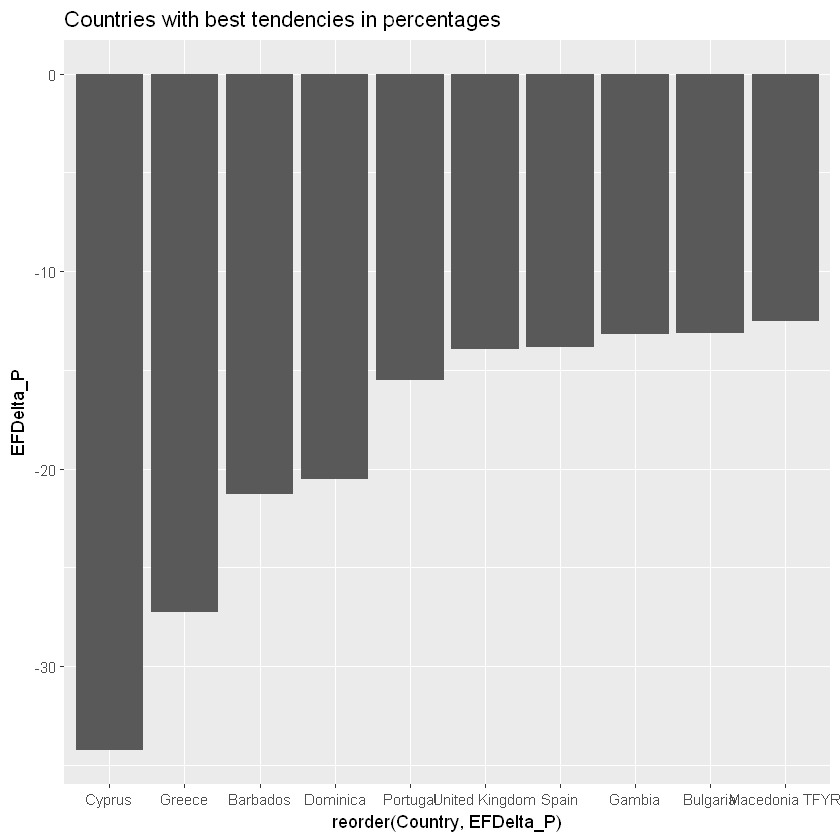

In [15]:
# Best tendencies in percentages
country_metrics_with_impact  %>% 
    arrange(EFDelta_Rank) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10) %>% 
    ggplot() +
      geom_bar(aes(reorder(Country, EFDelta_P), EFDelta_P),
           stat = "identity")+
        ggtitle("Countries with best tendencies in percentages")

In [16]:
# Plot some history for specific Countries of interest
# (better search for interessting patterns)
country_history <- read_csv(
   paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
          "NFA 2017 Edition.csv"))

country_history  %>% head(10)


Parsed with column specification:
cols(
  country = col_character(),
  year = col_integer(),
  country_code = col_integer(),
  record = col_character(),
  crop_land = col_double(),
  grazing_land = col_double(),
  forest_land = col_double(),
  fishing_ground = col_double(),
  built_up_land = col_double(),
  carbon = col_double(),
  total = col_double(),
  QScore = col_integer()
)
Warning message:
"127872 parsing failures.
  row            col expected actual
80785 crop_land      a double   NULL
80785 grazing_land   a double   NULL
80785 forest_land    a double   NULL
80785 fishing_ground a double   NULL
80785 built_up_land  a double   NULL
..... .............. ........ ......
See problems(...) for more details.
"

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
Armenia,1992,1,AreaPerCap,1.400203e-01,1.991593e-01,9.699957e-02,3.681693e-02,2.925786e-02,0.000000e+00,5.022540e-01,5
Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,3.346000e+05,1.270000e+05,1.009250e+05,0.000000e+00,1.732525e+06,5
Armenia,1992,1,BiocapPerCap,2.765314e-01,1.348916e-01,8.383927e-02,1.370460e-02,5.778247e-02,0.000000e+00,5.667493e-01,5
Armenia,1992,1,BiocapTotGHA,9.538950e+05,4.653085e+05,2.892036e+05,4.727402e+04,1.993206e+05,0.000000e+00,1.955002e+06,5
Armenia,1992,1,EFConsPerCap,4.774125e-01,1.758798e-01,1.254684e-06,4.113147e-03,5.778247e-02,1.097617e+00,1.812806e+00,5
Armenia,1992,1,EFConsTotGHA,1.646834e+06,6.066974e+05,4.328034e+00,1.418830e+04,1.993206e+05,3.786229e+06,6.253274e+06,5
Armenia,1992,1,EFExportsPerCap,1.535785e-03,2.070978e-03,0.000000e+00,4.485983e-04,0.000000e+00,4.744830e-02,5.150366e-02,5
Armenia,1992,1,EFExportsTotGHA,5.297689e+03,7.143839e+03,0.000000e+00,1.547440e+03,0.000000e+00,1.636729e+05,1.776619e+05,5
Armenia,1992,1,EFImportsPerCap,2.024169e-01,5.634172e-02,1.254684e-06,3.299335e-03,0.000000e+00,8.822890e-02,3.502881e-01,5
Armenia,1992,1,EFImportsTotGHA,6.982370e+05,1.943508e+05,4.328034e+00,1.138106e+04,0.000000e+00,3.043456e+05,1.208319e+06,5


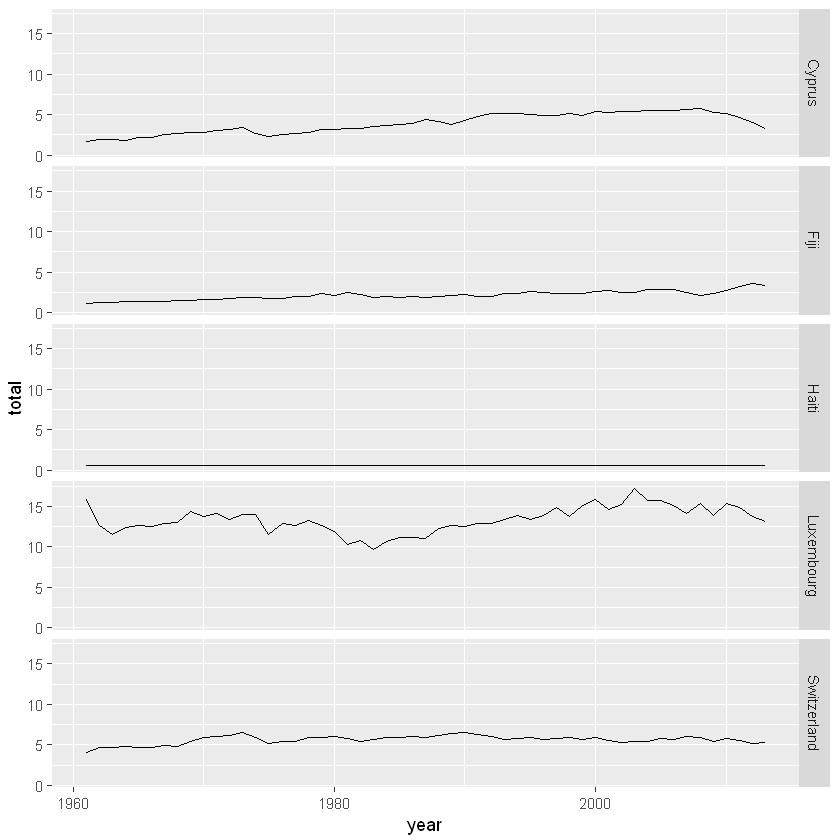

In [17]:

country_history %>% 
  filter(record == "EFConsPerCap") %>%
  arrange(desc(total)) %>% 
  select(country) %>% 
  unique() -> sorted_countries


country_of_interest <- c(
  "Luxembourg",       # highest EF per capita
  "Haiti",            # lowest EF per capita
  "Fiji",             # worst tendency
  "Cyprus",            # best tendency
  "Switzerland"  
  )

country_history %>% 
  filter(country %in% country_of_interest) %>% 
  select(country, total, record, year) %>% 
  arrange(desc(total)) %>% 
  filter(record == "EFConsPerCap") %>%
  ggplot() +
  geom_line(aes(year, total)) +
  facet_grid(country ~ .)

In [18]:
# plot some data of the interesting countries
country_metrics_with_impact  %>%
  filter(Country %in% country_of_interest) %>% 
  select(Country, HDI, Population, GDP2013)

Country,HDI,Population,GDP2013
Cyprus,0.85,1141652,23356225780
Fiji,0.73,880487,3486033014
Haiti,0.49,10431249,7494399817
Luxembourg,0.89,544885,55554172185
Switzerland,0.94,8118719,608548000000


In [19]:
nfa_2017_edition <- read_csv(
   paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
          "NFA 2017 Edition.csv"))

Parsed with column specification:
cols(
  country = col_character(),
  year = col_integer(),
  country_code = col_integer(),
  record = col_character(),
  crop_land = col_double(),
  grazing_land = col_double(),
  forest_land = col_double(),
  fishing_ground = col_double(),
  built_up_land = col_double(),
  carbon = col_double(),
  total = col_double(),
  QScore = col_integer()
)
Warning message:
"127872 parsing failures.
  row            col expected actual
80785 crop_land      a double   NULL
80785 grazing_land   a double   NULL
80785 forest_land    a double   NULL
80785 fishing_ground a double   NULL
80785 built_up_land  a double   NULL
..... .............. ........ ......
See problems(...) for more details.
"

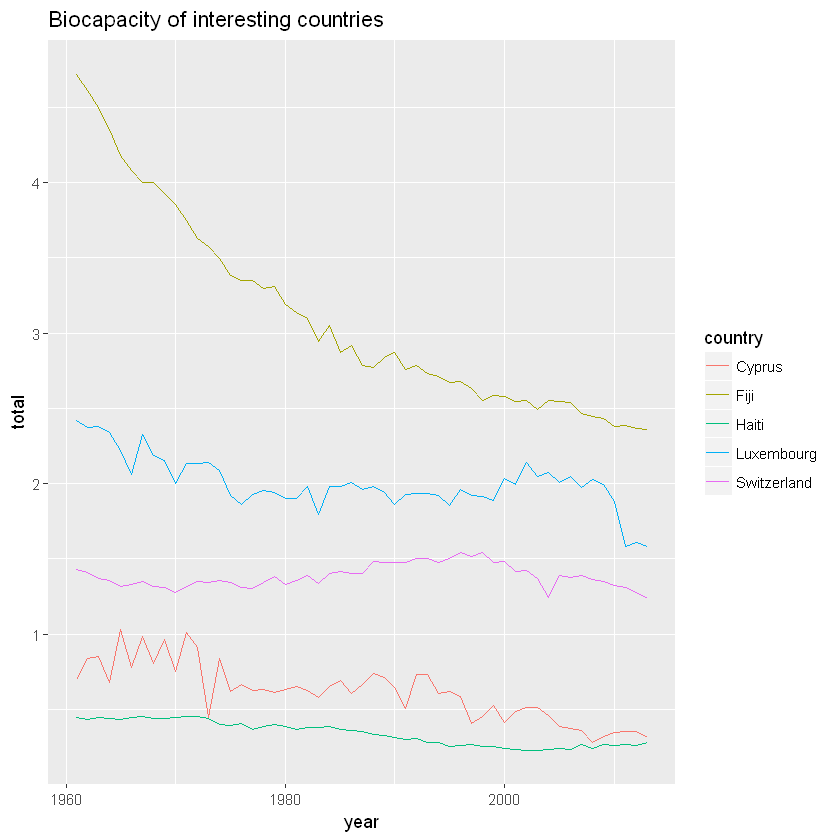

In [20]:
nfa_2017_edition  %>% 
    filter(country %in% country_of_interest) %>% 
    filter(record == "BiocapPerCap") %>% 
    ggplot() +
        geom_line(aes(year,total, col = country)) +
        ggtitle("Biocapacity of interesting countries")

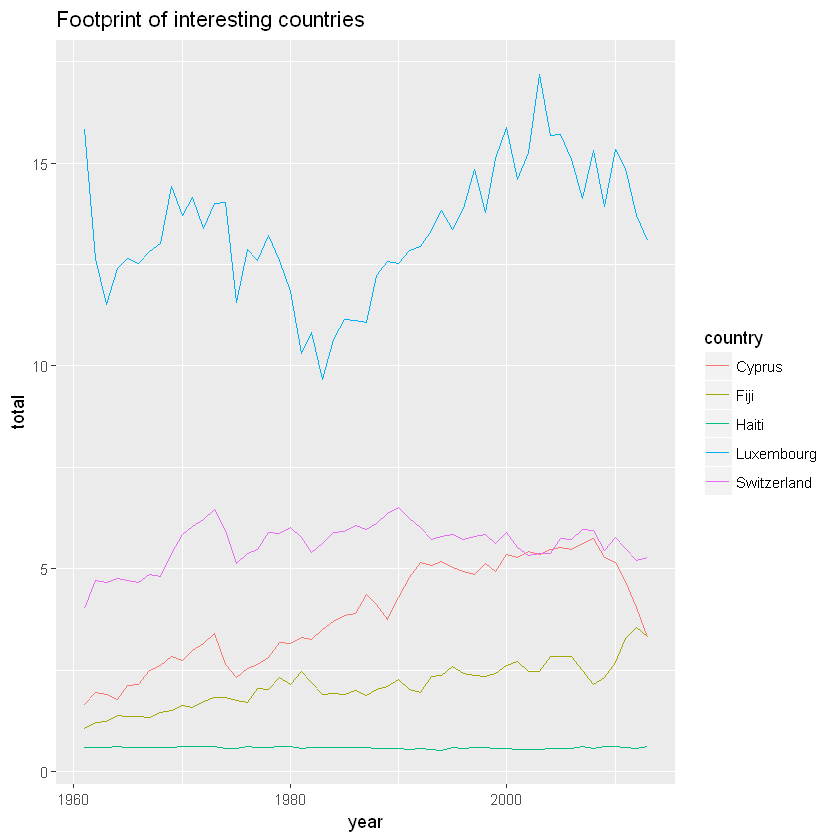

In [21]:
nfa_2017_edition  %>% 
    filter(country %in% country_of_interest) %>% 
    filter(record == "EFConsPerCap") %>% 
    ggplot() +
        geom_line(aes(year,total, col = country)) +
        ggtitle("Footprint of interesting countries")

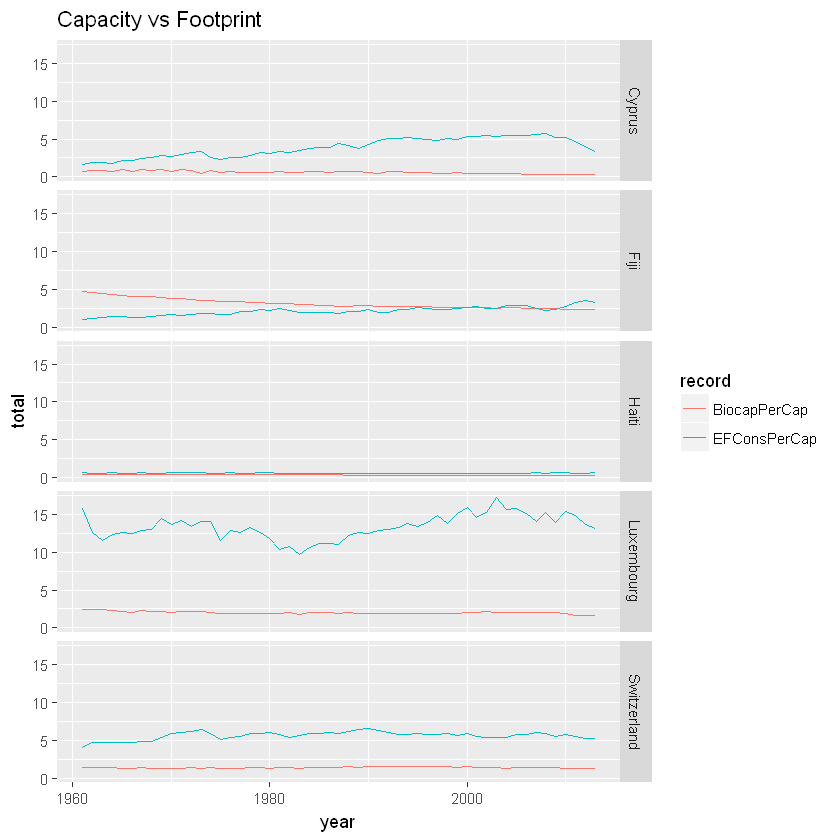

In [22]:
nfa_2017_edition  %>% 
    filter(country %in% country_of_interest) %>% 
    filter(record == "EFConsPerCap" | record == "BiocapPerCap") %>% 
    ggplot() +
        geom_line(aes(year,total, col = record)) +
        facet_grid(country~.)+
        ggtitle("Capacity vs Footprint")

In [27]:
# Current world Biocapacity
nfa_2017_edition  %>% 
    filter(country == "World") %>% 
    filter(record == "BiocapPerCap") %>% 
    arrange(desc(year)) %>% 
    head(1)

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
World,2013,5001,BiocapPerCap,0.5539028,0.2131634,0.7218349,0.1523134,0.06408095,0,1.705295,6


In [31]:
# Current world Footprint
nfa_2017_edition  %>% 
    filter(country == "World") %>% 
    filter(record == "EFConsPerCap") %>% 
    arrange(desc(year)) %>% 
    head(1)

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
World,2013,5001,EFConsPerCap,0.5539028,0.1582954,0.2779329,0.0907955,0.06408095,1.723774,2.868783,6


In [29]:
# Current footpring of Haiti
nfa_2017_edition  %>% 
    filter(country == "Haiti") %>% 
    filter(record == "EFConsPerCap") %>% 
    arrange(desc(year)) %>% 
    head(1)

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
Haiti,2013,93,EFConsPerCap,0.3036046,0.03685896,0.1008213,0.01689779,0.0295203,0.1194957,0.6071986,6


In [30]:
# Current footpring of Haiti
nfa_2017_edition  %>% 
    filter(country == "Luxembourg") %>% 
    filter(record == "EFConsPerCap") %>% 
    arrange(desc(year)) %>% 
    head(1)

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
Luxembourg,2013,256,EFConsPerCap,1.065997,0.7324783,0.6459861,0.1340623,0.1387033,10.37437,13.09159,5


In [42]:
# World history
nfa_2017_edition  %>% 
    filter(country == "World") %>% 
    filter(record == "EFConsPerCap") %>% 
    arrange(desc(year)) -> world_footprint

head(world_footprint, 1) 
tail(world_footprint, 1) 

nfa_2017_edition  %>% 
    filter(country == "World") %>% 
    filter(record == "BiocapPerCap") %>% 
    arrange(desc(year)) -> world_footprint

head(world_footprint, 1) 
tail(world_footprint, 1) 

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
World,2013,5001,EFConsPerCap,0.5539028,0.1582954,0.2779329,0.0907955,0.06408095,1.723774,2.868783,6


country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
World,1961,5001,EFConsPerCap,0.4631302,0.2642444,0.4305947,0.09527934,0.02618594,0.9919088,2.271341,6


country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
World,2013,5001,BiocapPerCap,0.5539028,0.2131634,0.7218349,0.1523134,0.06408095,0,1.705295,6


country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
World,1961,5001,BiocapPerCap,0.4631302,0.4805951,1.787341,0.3667015,0.02618594,0,3.123954,6


In [43]:
# Current footpring of Switerland
nfa_2017_edition  %>% 
    filter(country == "Switzerland") %>% 
    filter(record == "EFConsPerCap") %>% 
    arrange(desc(year)) %>% 
    head(1)

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
Switzerland,2013,211,EFConsPerCap,0.7103427,0.224549,0.3471569,0.06928158,0.1068956,3.824961,5.283186,6


In [44]:
# Current biocap of Switerland
nfa_2017_edition  %>% 
    filter(country == "Switzerland") %>% 
    filter(record == "BiocapPerCap") %>% 
    arrange(desc(year)) %>% 
    head(1)

country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
Switzerland,2013,211,BiocapPerCap,0.2793591,0.1149334,0.7317722,0.006429604,0.1068956,0,1.23939,6
